# CORDIC algorithm in hyperbolic coordinates

## Classical method 

In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def constant(iterations):
    A_list = []
    iterations_list = []
    A = 1
    for i in range(1, iterations+1):
        A *= math.sqrt(1 - 2**(-2*i))
        A_list.append(A)
        iterations_list.append(i)
    return {'constant value': A_list, 'iterations': iterations_list }  

Constant_n = 0.8297816201389014


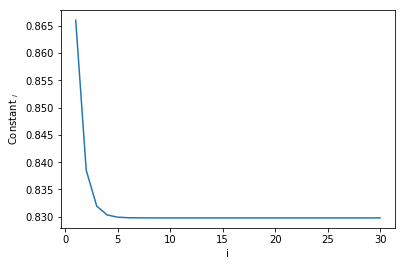

In [3]:
plt.plot(constant(30)['iterations'], constant(30)['constant value'])
plt.xlabel('i')
plt.ylabel('Constant $_{i}$')
print("Constant_n = " + str(constant(30)['constant value'][-1]))

In [4]:
def Hyperbolic_rotation_mode(x, y, z, iterations):
    def Arc_lib(iteration):
        return math.atanh(2**(-1*iteration))
    x_list = []
    y_list = []
    z_list = []
    iterations_list = []
    i = 0;                 
    _x = x          
    _y = y         
    _z = z         
    di = 0
    i = 1
    temp = 0
    if (iterations > 0):
        while (i < iterations):
            if (_z < 0):
                di = -1
            else:
                di = +1
            new_z = _z - di * Arc_lib(i)
            new_x = _x + di * _y * (2**(-1*i))
            new_y = _y + di * _x * 2**(-1*i)
            
            _x = new_x
            _y = new_y
            _z = new_z

            x_list.append(_x)
            y_list.append(_y)
            z_list.append(_z)
            iterations_list.append(i)
            if ((i != 4) & (i != 13) & (i!=40)):
                i = i+1
            elif (temp == 0):
                temp = 1
            elif (temp == 1):
                temp = 0
                i = i+1
    return { 'x':x_list, 'y':y_list, 'z':z_list, 'iteration':iterations_list, }

In [5]:
result_dict_1 = Hyperbolic_rotation_mode(1.207497067763, 0, 0.3, 50)
result_dict_2 = Hyperbolic_rotation_mode(1.207497067763, 0, 0.15, 50)

Zn1 =-1.5319552961408094e-15
Zn2 =-1.3269346637921605e-15


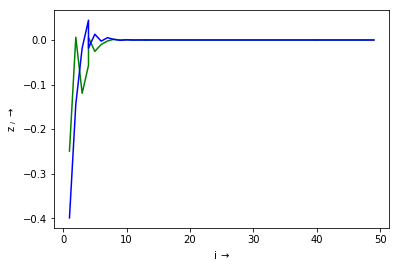

In [6]:
plt.plot(result_dict_1['iteration'], result_dict_1['z'], 'g', result_dict_2['iteration'], result_dict_2['z'], 'b')
plt.xlabel('i $\\rightarrow$')
plt.ylabel('z $_{i}$ $\\rightarrow$')
print("Zn1 =" + str(result_dict_1['z'][-1]))
print("Zn2 =" + str(result_dict_2['z'][-1]))

Xn1 = Cosh(0.3) = 1.0453385141287979
Xn2 = Cosh(0.15) = 1.011271109576611


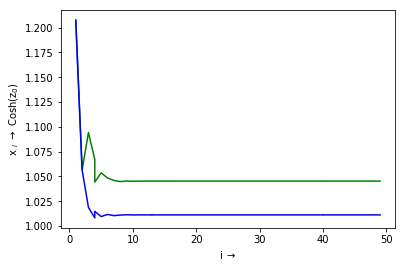

In [7]:
plt.plot(result_dict_1['iteration'], result_dict_1['x'], 'g', result_dict_2['iteration'], result_dict_2['x'], 'b')
plt.xlabel('i $\\rightarrow$')
plt.ylabel('x $_{i}$ $\\rightarrow$ Cosh(z$_{0}$)')
print("Xn1 = Cosh(0.3) = " + str(result_dict_1['x'][-1]))
print("Xn2 = Cosh(0.15) = " + str(result_dict_2['x'][-1]))

Yn1 = Sinh(0.3) = 0.30452029344712606
Yn2 = Sinh(0.15) = 0.150563133151605


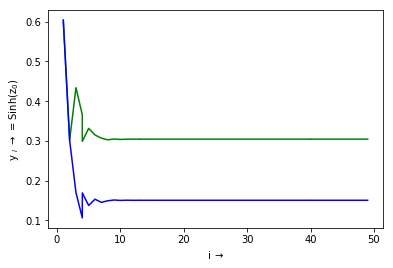

In [8]:
plt.plot(result_dict_1['iteration'], result_dict_1['y'], 'g', result_dict_2['iteration'], result_dict_2['y'], 'b')
plt.xlabel('i $\\rightarrow$')
plt.ylabel('y $_{i}$ $\\rightarrow$ = Sinh(z$_{0}$)')
print("Yn1 = Sinh(0.3) = " + str(result_dict_1['y'][-1]))
print("Yn2 = Sinh(0.15) = " + str(result_dict_2['y'][-1]))

## Modified method 

In [82]:
def Hyperbolic_rotation_mode_modified(x, y, z, iter_neg, iter_pos):
    def Arc_lib(iteration, mode):
        if mode == 1:
            return math.atanh(2**(-1*iteration))
        if mode == -1:
            return math.atanh(1-2**(iteration - 2))
    x_list = []
    y_list = []
    z_list = []
    iterations_list = []
    k = 0;                 
    _x = x          
    _y = y         
    _z = z         
    di = 0
    i = 1
    temp1 = 0
    temp2 = 0
    k = iter_neg
    if (iter_neg < 0):
        while (k < 1):
            if (_z < 0):
                di = -1
            else:
                di = +1
                
            new_z = _z - di * Arc_lib(k, -1)
            new_x = _x + di * _y * (1 - 2**(k-2))
            new_y = _y + di * _x * (1 - 2**(k-2))
            
            _x = new_x
            _y = new_y
            _z = new_z
            x_list.append(_x)
            y_list.append(_y)
            z_list.append(_z)
            iterations_list.append(k)
            k += 1  
    if (iter_pos > 0):
        while (i < iter_pos):
            if (_z < 0):
                di = -1
            else:
                di = +1
            new_z = _z - di * Arc_lib(i, 1)
            new_x = _x + di * _y * (2**(-1*i))
            new_y = _y + di * _x * 2**(-1*i)
            
            _x = new_x
            _y = new_y
            _z = new_z

            x_list.append(_x)
            y_list.append(_y)
            z_list.append(_z)
            iterations_list.append(i)
            if ((i != 4) & (i != 13) & (i!=40)):
                i = i+1
            elif (temp2 == 0):
                temp2 = 1
            elif (temp2 == 1):
                temp2 = 0
                i = i+1
    return { 'x':x_list, 'y':y_list, 'z':z_list, 'iteration':iterations_list, }

In [83]:
A = Hyperbolic_rotation_mode_modified(1.207497067763, 0, 0.15,-30, 10)
print(A['x'])

[1.207497067763, 8.434268838897196e-10, 5.622844414919108e-10, 2.0946731874807885e-18, 2.0946736010710932e-18, 2.3409798652055382e-26, 1.560652844233083e-26, 9.302217492430184e-34, 9.302219300441407e-34, 1.663366148832844e-40, 1.1089105884680371e-40, 1.0575394537668856e-46, 1.0575396122092836e-46, 3.025642874344313e-52, 2.0170980527006198e-52, 3.0778338891191085e-57, 3.07783214882323e-57, 1.4089059446705624e-61, 9.392952249996601e-62, 2.2930337306137206e-65, 2.2930061975768415e-65, 1.6791879899179138e-68, 1.1199321513690655e-68, 4.369611118176721e-71, 4.368761138809665e-71, 5.106969709003888e-73, 3.4277421433919605e-73, 2.10241161752969e-74, 2.0961666068317292e-74, 3.7736075347833546e-75, 2.797079291944631e-75, 2.032995294960022e-75, 2.0005882079607965e-75, 1.9532606484929086e-75, 1.9612948328521588e-75, 1.9769589416195845e-75, 1.9652962332654572e-75, 1.9604301910716062e-75, 1.9626233078431818e-75, 1.9614669218758793e-75, 1.962030141231999e-75]


In [65]:
def Arc_lib1(iteration, mode):
        if mode == 1:
            return math.atanh(2**(-1*iteration))
        if mode == -1:
            return math.atanh(1-2**(iteration - 2))

In [71]:
print(Arc_lib(-8, -1))

3.8120652928306447
